In [ ]:
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import io
from scipy import stats
import seaborn as sns

In [ ]:
# from google.colab import files


# uploaded = files.upload()


# df = pd.read_csv(io.BytesIO(uploaded['yandex_music_project.csv']))
#https://drive.google.com/file/d/11qVmgAV4ScMhUJqUp4MMrwycztljNdNn/view?usp=sharing

In [ ]:
url = 'https://drive.google.com/file/d/11qVmgAV4ScMhUJqUp4MMrwycztljNdNn/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Survived выжил (1-да, 0- нет)

Pclass Класс круиза

Name ФИО

Sex Пол

Age Возраст

SibSp число братьев, сестер или супругов на борту у человека

Parch количество родителей или детей, с которыми путешествовал каждый пассажир

Ticket Номер билета

Fare Цена билета

Cabin Номер каюты

Embarked Порт посадки

4. Определить количество пустых ячеек

In [ ]:
# Определение количества пустых ячеек в каждом столбце
null_counts = df.isnull().sum()
null_counts


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Определение общего количества пустых ячеек в таблице
total_nulls = null_counts.sum()
total_nulls


866

5. *Заполнить пустые ячейки используя любую логику замещения данных

In [ ]:
# Заполнение пустых ячеек средним значением для числовых столбцов
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(value='NULL')

In [ ]:

df['Embarked'] = df['Embarked'].fillna(value='NULL')

In [ ]:
# Проверяем все ли ячейки заполнены
null_counts = df.isnull().sum()
null_counts


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NULL,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NULL,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NULL,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NULL,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NULL,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


7. По каждому признаку произвести аналитику:
* Количество уникальных значений
* Минимальное и максимальное значение

In [ ]:
# Определение количества уникальных значений для каждого столбца
unique_counts = df.nunique()
unique_counts

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [ ]:
# Определение минимального и максимального значения для каждого числового столбца
min_values = df.min(numeric_only=True)
min_values = df.min()
min_values

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Cabin                          A10
Embarked                         C
dtype: object

In [ ]:
max_values = df.max(numeric_only=True)
max_values = df.max()
max_values

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Cabin                                    T
Embarked                                 S
dtype: object

In [ ]:
# Вычисление корреляции между признаками
corr = df.corr()

# Отображение корреляции между признаком Survived и другими признаками
print(corr['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


<ipython-input-13-cd30654197e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
# Определение столбцов для проверки корреляции
columns_to_check = ['Survived', 'Parch', 'Age']

# Вычисление корреляции между выбранными столбцами
corr = df.corr()

# Отображение матрицы корреляции
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-22-4ebf678abf9c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

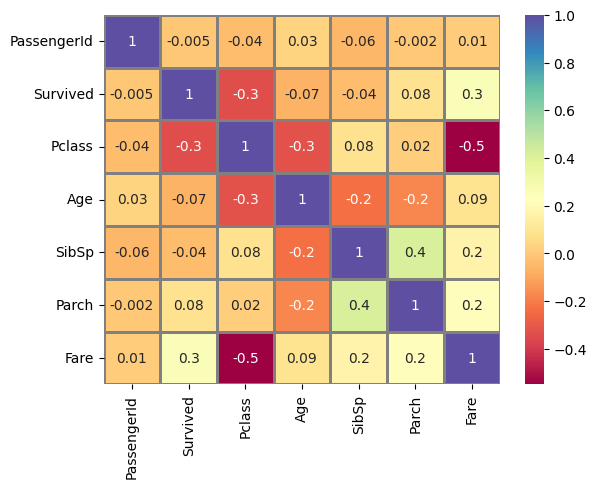

In [ ]:
sns.heatmap(corr, cmap="Spectral", annot = True, fmt='.1g', linewidths=1, linecolor='gray')

На тепловой карте корреляция принимает наиболььшие значения между столбцами Pclass(Класс круиза) и Fare (Цена билета), а  так же  между SibSp (число братьев, сестер или супругов на борту у человека) и Parch (количество родителей или детей, с которыми путешествовал каждый пассажир)




In [ ]:
# Отображение корреляции между признаком Pclass и другими признаками
print(corr['Pclass'].sort_values(ascending=False))

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Age           -0.331339
Survived      -0.338481
Fare          -0.549500
Name: Pclass, dtype: float64


Text(0, 0.5, 'Выживших')

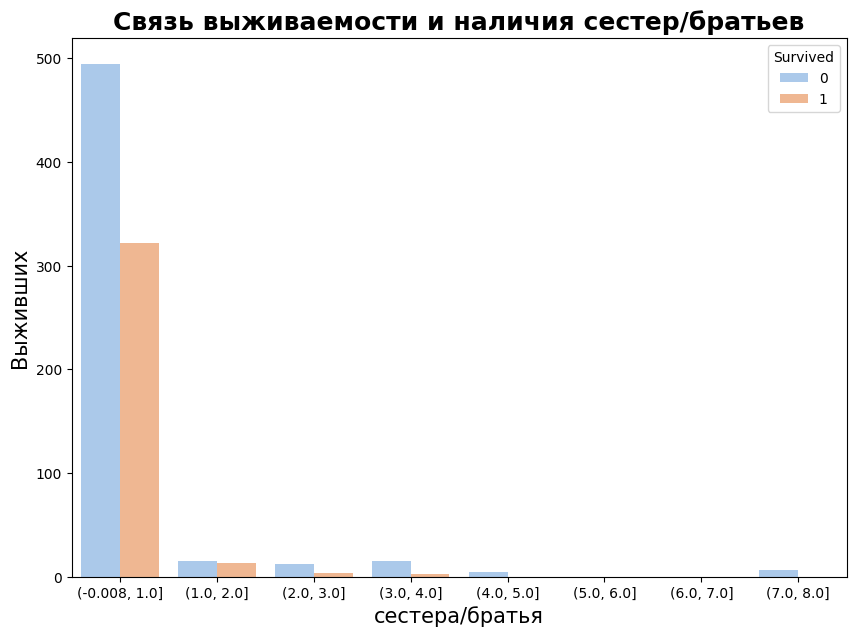

In [ ]:
df['SibSpGroup'] = pd.cut(df['SibSp'], bins=8)

# Визуализация данных
# change order x axis + change pallete
day_order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-8']
countplt, ax = plt.subplots(figsize = (10,7))
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt

#countplot legend outside the chart
ax.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), \
               title="Time", \
               title_fontsize = 15);
countplt

ax = sns.countplot(x='SibSpGroup', hue='Survived', data=df, palette='pastel' )
# Chart and axes titles
ax.set_title('Cвязь выживаемости и наличия сестер/братьев',fontsize = 18, fontweight='bold' )

ax.set_xlabel('сестера/братья', fontsize = 15)
ax.set_ylabel('Выживших', fontsize = 15)
#countplt


In [ ]:
# Отображение корреляции между признаком Parch и другими признаками
print(corr['Age'].sort_values(ascending=False))

Age            1.000000
Fare           0.091566
PassengerId    0.033207
Survived      -0.069809
Parch         -0.179191
SibSp         -0.232625
Pclass        -0.331339
Name: Age, dtype: float64


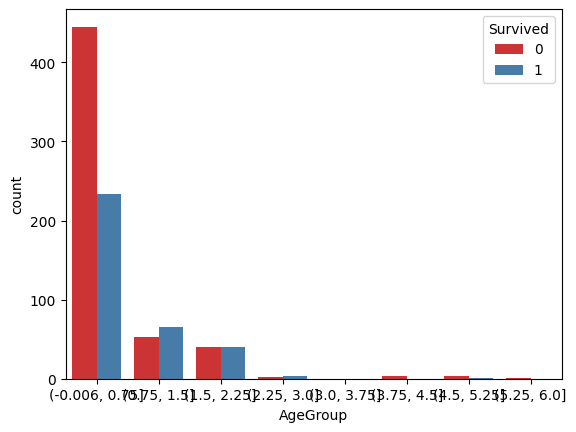

In [ ]:
df['AgeGroup'] = pd.cut(df['Parch'], bins=8)


ax = sns.countplot(x='AgeGroup', hue='Survived', data=df, palette="Set1" )
